In [2]:
import pandas as pd

data = {
    'Name': [
        'Paul', 'Monica', 'Lee', 'Eve', 'Fred', 'Irene', 'James', 'Lea',
        'Mary', 'Peter', 'Mary', 'Louis', 'Jonathan', 'Levy', 'Joseph',
        'Omar', 'Lisa', 'Elizabeth', 'Taylor', 'Yves'
    ],
    'Age': [
        48, 43, 82, 23, 46, 29, 42, 38, 31, 41, 43, 82, 23, 46, 17, 42, 38, 31, 46, 29
    ],
    'Education level': [
        1.0, 2.0, 3.0, 3.0, 5.0, 4.5, 4.1, 5.0, 3.0, 1.0, 2.0, 3.0, 3.5, 5.0,
        4.0, 4.0, 4.0, 2.0, 5.0, 4.0
    ],
    'Company': [
        'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good',
        'Good', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Good',
        'Good', 'Bad'
    ]
}

df = pd.DataFrame(data)
print(df)


         Name  Age  Education level Company
0        Paul   48              1.0     Bad
1      Monica   43              2.0    Good
2         Lee   82              3.0     Bad
3         Eve   23              3.0     Bad
4        Fred   46              5.0    Good
5       Irene   29              4.5     Bad
6       James   42              4.1    Good
7         Lea   38              5.0     Bad
8        Mary   31              3.0    Good
9       Peter   41              1.0    Good
10       Mary   43              2.0    Good
11      Louis   82              3.0    Good
12   Jonathan   23              3.5     Bad
13       Levy   46              5.0    Good
14     Joseph   17              4.0     Bad
15       Omar   42              4.0    Good
16       Lisa   38              4.0     Bad
17  Elizabeth   31              2.0    Good
18     Taylor   46              5.0    Good
19       Yves   29              4.0     Bad


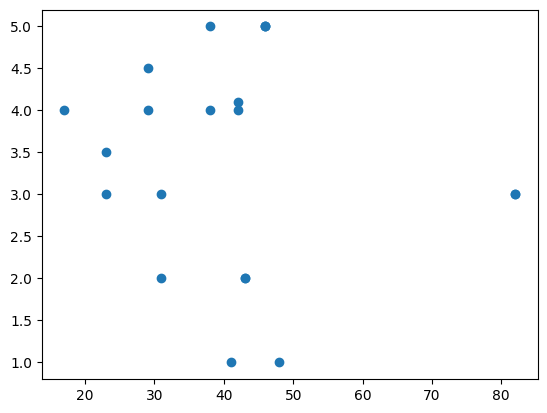

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Education level'])
plt.show()

**Kmeans**

Let's apply this clustering technique. First we utilize the elbow method to calculate visualize the inertia for different values of K

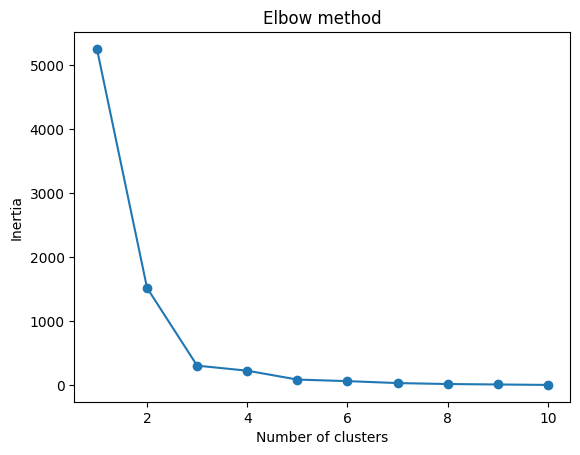

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
from sklearn.cluster import KMeans

data = list(zip(df['Age'], df['Education level']))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Ok so we will experiment with the K-values 2 and 3 (and also 5 just to put the things extreme and see what happens)

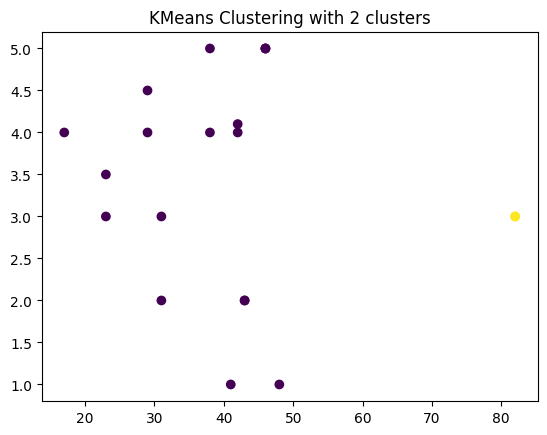

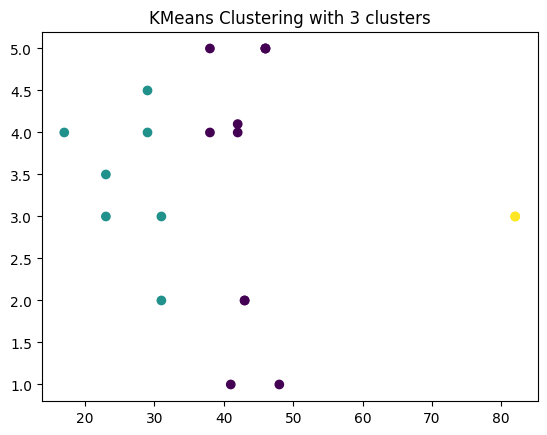

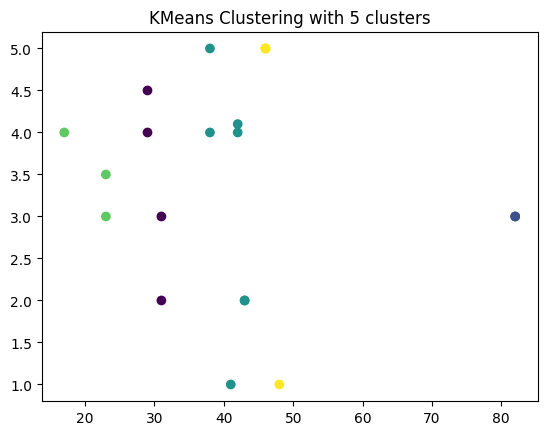

In [5]:
def kmeans_clustering(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    
    plt.title(f'KMeans Clustering with {n_clusters} clusters')
    plt.scatter(df['Age'], df['Education level'], c=kmeans.labels_)
    plt.show()

kmeans_clustering(2)
kmeans_clustering(3)
kmeans_clustering(5)



The result above seems to indicate that the best k-value is 3, where the yellow point could be a potential outlier.

**DBSCAN**

Let's test this other method. For the sake of testing we will use different hyperparameters: 12.5, 15, 16, 17.5

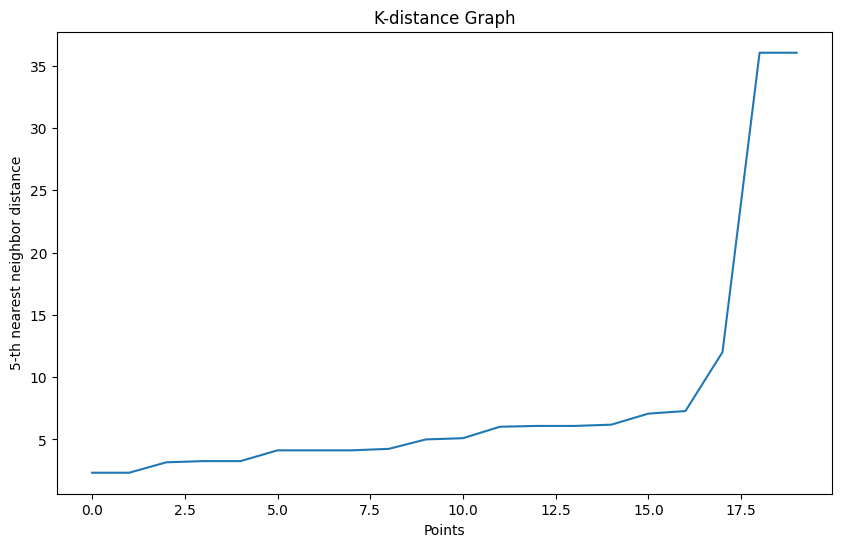

In [12]:
# Function to plot k-distance graph
from sklearn.neighbors import NearestNeighbors
import numpy as np


def plot_k_distance_graph(X, k):
    X = df[['Age', 'Education level']]
    
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()

# Plot k-distance graph
plot_k_distance_graph(df[['Age', 'Education level']], k=5)

In [ ]:
# Perform DBSCAN clustering
from sklearn.cluster import DBSCAN

X = df[['Age', 'Education level']]

def dbscan_clustering(epsilon, min_samples):
    min_samples = 4  # 2 * num_features (2D data)
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)

    # Visualize the results
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
    plt.colorbar(scatter)
    plt.title('DBSCAN Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

dbscan_clustering(epsilon=12.5, min_samples=4)

NameError: name 'X' is not defined

<Figure size 1000x600 with 0 Axes>